In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn

In [2]:
# read in the data
simpsons_characters = pandas.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-02-04/simpsons_characters.csv')
simpsons_episodes = pandas.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-02-04/simpsons_episodes.csv')
simpsons_locations = pandas.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-02-04/simpsons_locations.csv')
simpsons_script_lines = pandas.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-02-04/simpsons_script_lines.csv')


In [3]:
simpsons_characters.head()

,id,name,normalized_name,gender
0,7,Children,children,NaN
1,12,Mechanical Santa,mechanical santa,NaN
2,13,Tattoo Man,tattoo man,NaN
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN
4,20,Students,students,NaN


In [4]:
# how often does homer say donut
simpsons_script_lines[(simpsons_script_lines.character_id==2)&
(simpsons_script_lines.speaking_line)]['spoken_words'].str.contains('onut').value_counts()

spoken_words
False    5144
True       14
Name: count, dtype: int64

In [5]:
# type to boolean
simpsons_script_lines.speaking_line = simpsons_script_lines.speaking_line.astype(bool)

In [6]:
# get the counts
donuts = simpsons_script_lines[(simpsons_script_lines.speaking_line) &
                     (simpsons_script_lines.spoken_words.str.contains('donut', case=False, regex=False))].copy()

d = donuts.character_id.value_counts()
# merge with character names
df = pandas.DataFrame(d)
dfcnts = df.merge(simpsons_characters, how="left", left_index=True, right_on="id")

dfcnts

,count,id,name,normalized_name,gender
6659,13,2,Homer Simpson,homer simpson,m
6660,4,15,C. Montgomery Burns,c montgomery burns,m
70,2,1,Marge Simpson,marge simpson,f
184,1,165,Lenny Leonard,lenny leonard,m
79,1,14,Waylon Smithers,waylon smithers,m
72,1,9,Lisa Simpson,lisa simpson,f
891,1,915,Donut Man,donut man,NaN
6144,1,6212,Terence,terence,m
71,1,8,Bart Simpson,bart simpson,m


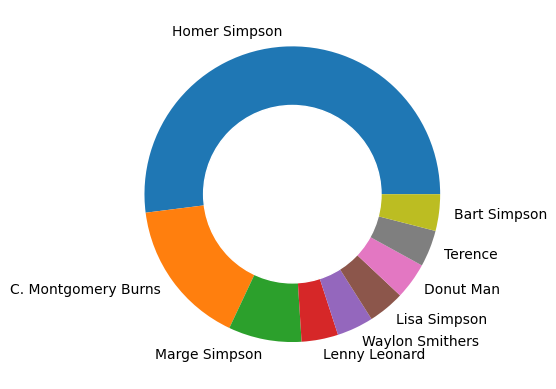

In [7]:
# donut plot for donuts
plt.pie(dfcnts['count'], labels=dfcnts['name']);
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

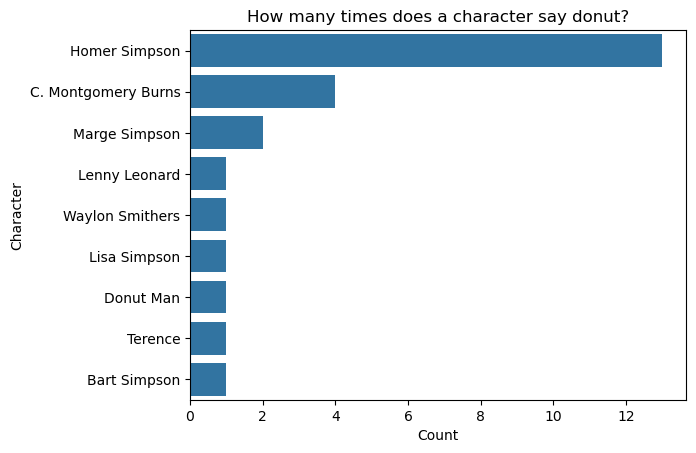

In [8]:
# bar plot for clarity
ax = seaborn.barplot(y='name',x='count',data=dfcnts, orient='y');
ax.set_title("How many times does a character say donut?")
ax.set_ylabel("Character")
ax.set_xlabel("Count");

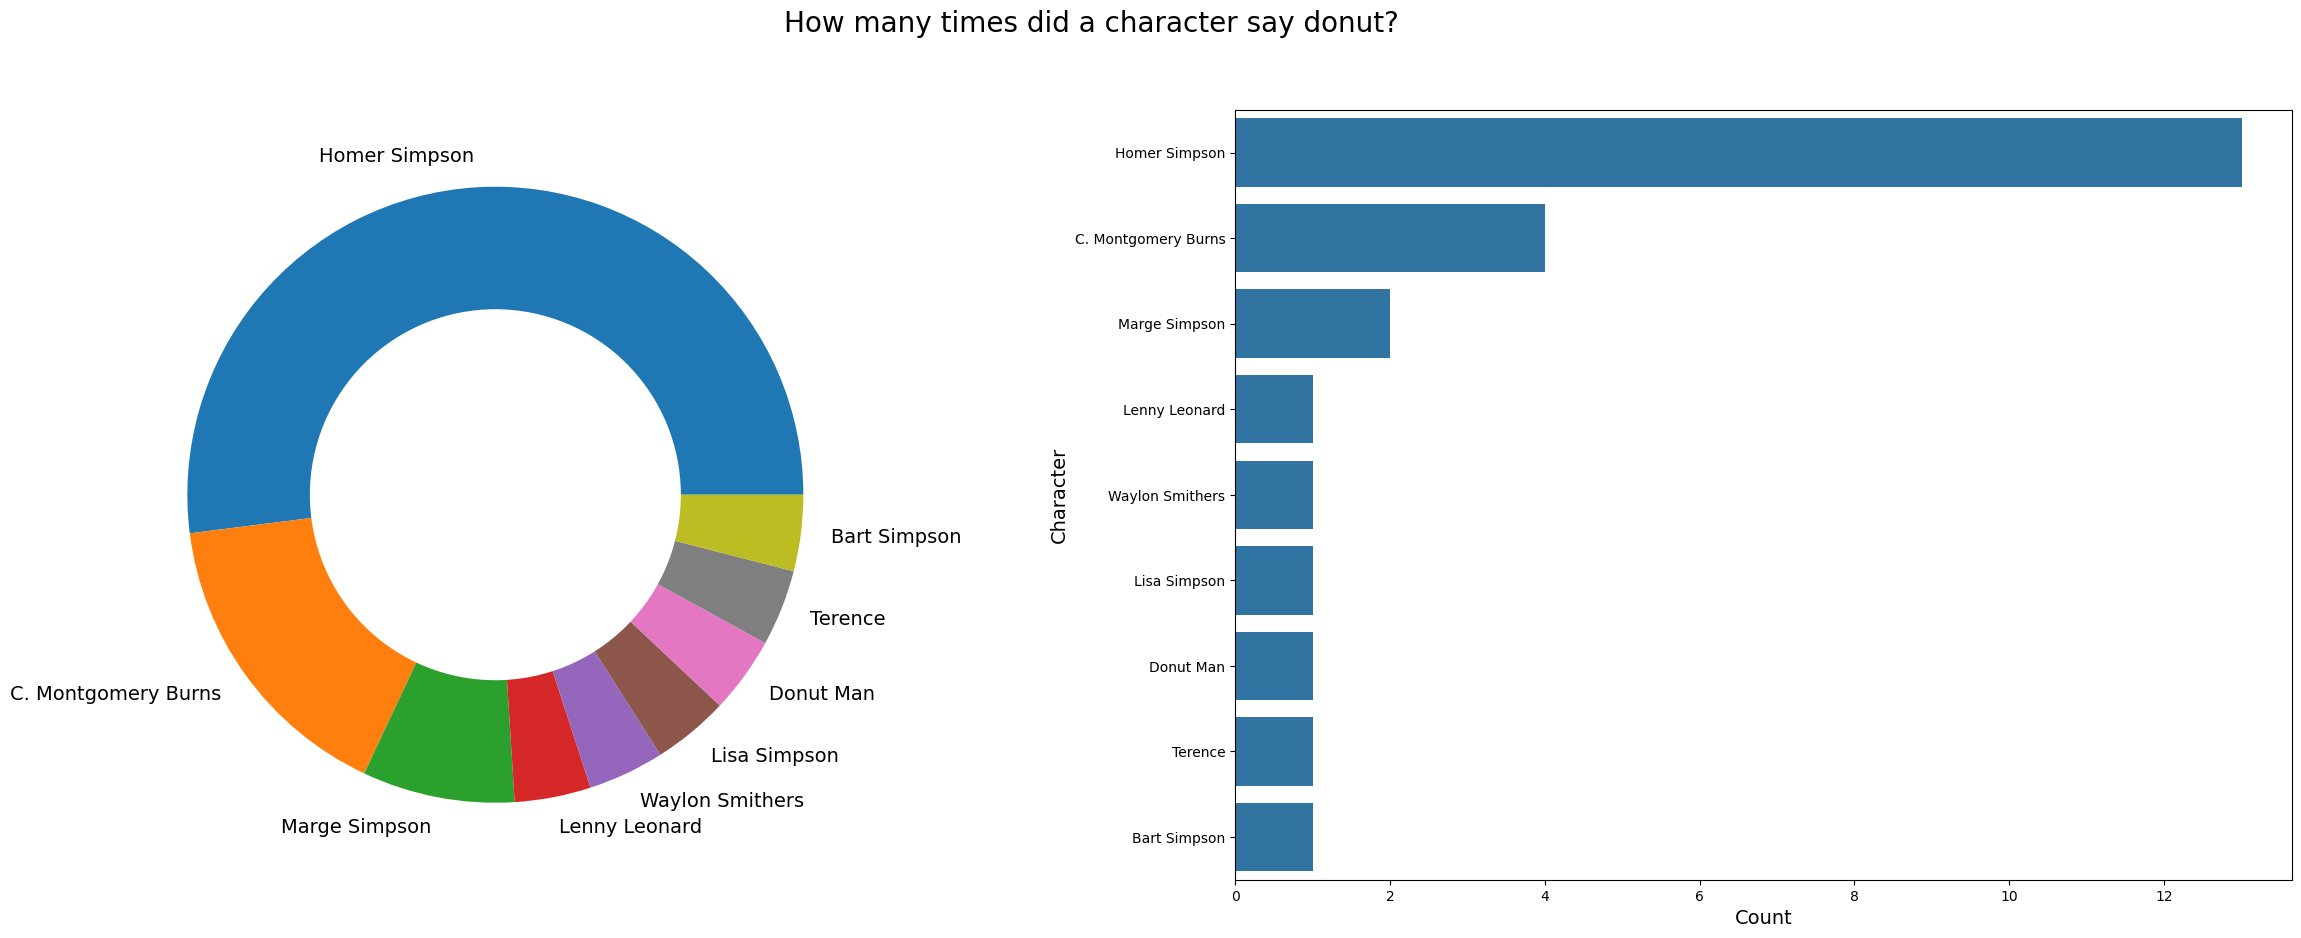

In [50]:
#now let's put them together
fig, ax = plt.subplots(1,2, figsize=(30, 10))
ax[0].pie(dfcnts['count'], labels=dfcnts['name'],
         textprops={'fontsize' : 14});
my_circle=plt.Circle( (0,0), 0.6, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)
ax[0].add_patch(my_circle)

seaborn.barplot(y='name',x='count',data=dfcnts, orient='y', ax=ax[1]);
ax[1].set_ylabel("Character", fontsize=14)
ax[1].set_xlabel("Count", fontsize=14)
ax[1].tick_params(axis='both', which='minor', labelsize=14);

# plt.gcf()
fig.suptitle("How many times did a character say donut?", fontsize=20)
plt.savefig("donut.png",bbox_inches="tight")

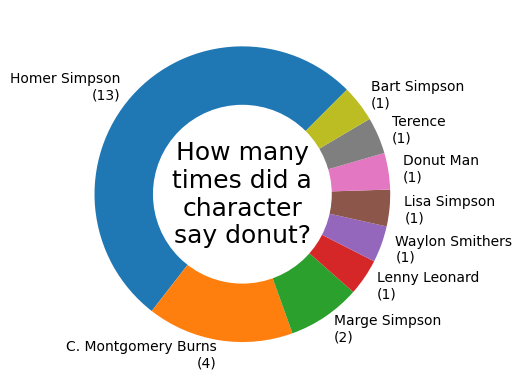

In [48]:
# donut plot for donuts
nlab = [f'{n}\n({c})' for n,c in zip(dfcnts['name'],dfcnts['count'])]
fig, ax = plt.subplots()
plt.pie(dfcnts['count'], labels=nlab, 
       startangle=45);
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
label = ax.annotate(
    "How many\ntimes did a\ncharacter\nsay donut?",
    xy=(0, 0),
    fontsize=18,
    verticalalignment="center",
    horizontalalignment="center"
)
# plt.show();
plt.savefig("donut2.png",bbox_inches="tight")